# TD2: Data Analysis and Visualisation with Python

## Import modules

In [151]:
import pandas as pd

## Exercice 1

### Question 1

In [152]:
data = pd.read_csv("data/Stat_covid.csv")
data.head()

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W01,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
1,Austria,AT,2020-W02,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
2,Austria,AT,2020-W03,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
3,Austria,AT,2020-W04,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
4,Austria,AT,2020-W05,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN


### Question 2

In [153]:
len(data)

5760

In [154]:
data.isna().sum()

country                   0
country_code              0
year_week                 0
level                     0
region                    0
region_name               0
new_cases               228
tests_done             1152
population                0
testing_rate           1152
positivity_rate        1174
testing_data_source    1152
dtype: int64

### Question 3

In [155]:
data.fillna(0, inplace=True)
data.isna().sum()

country                0
country_code           0
year_week              0
level                  0
region                 0
region_name            0
new_cases              0
tests_done             0
population             0
testing_rate           0
positivity_rate        0
testing_data_source    0
dtype: int64

### Question 4

In [156]:
data['year'] = data['year_week'].str[0:4]
data['week'] = data['year_week'].str[6:].astype(int)

In [157]:
data[(data['year'] == '2022') & (data['country'].isin(['France', 'Germany', 'Spain', 'Italy']))].groupby('country')['new_cases'].mean().reset_index()

,country,new_cases
0,France,559769.846154
1,Germany,580207.000000
2,Italy,362890.576923
3,Spain,132235.942308


### Question 5

<Axes: title={'center': 'Total number of new cases by country'}, xlabel='country'>

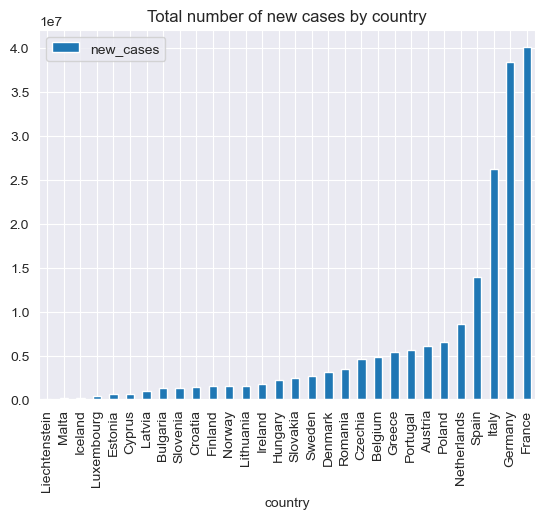

In [158]:
total_cases = data.groupby('country')['new_cases'].sum().reset_index().sort_values('new_cases')
total_cases.plot(title = 'Total number of new cases by country', x='country', y='new_cases', kind='bar')

### Question 6

<Axes: title={'center': 'Total number of new cases (<30 000 000) by country'}, xlabel='country'>

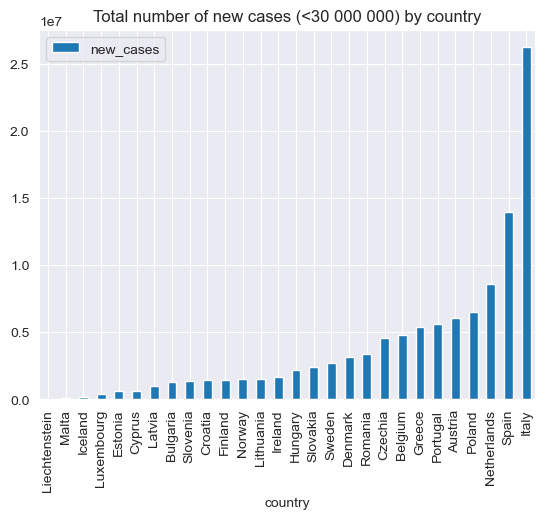

In [159]:
total_cases[total_cases['new_cases'] < 30000000].plot(title = 'Total number of new cases (<30 000 000) by country', x='country', y='new_cases', kind='bar')

### Question 7

In [160]:
from sklearn.cluster import KMeans

df = total_cases

X = df['new_cases'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

df['cluster'] = kmeans.labels_

# Map the cluster labels to the corresponding severity levels
severity_map = {0: 'Medium', 1: 'Severe', 2: 'Mild'}
df['severity'] = df['cluster'].map(severity_map)
df.drop('cluster', axis=1, inplace=True)

/Users/alexandrecogordan/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: ylabel='count'>

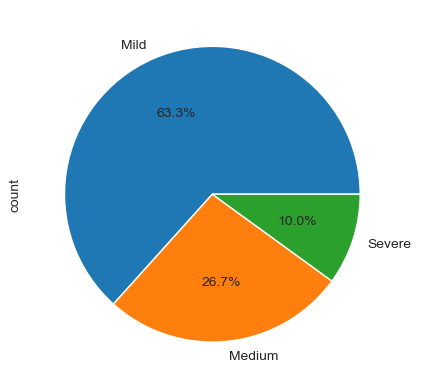

In [161]:
df['severity'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Question 8

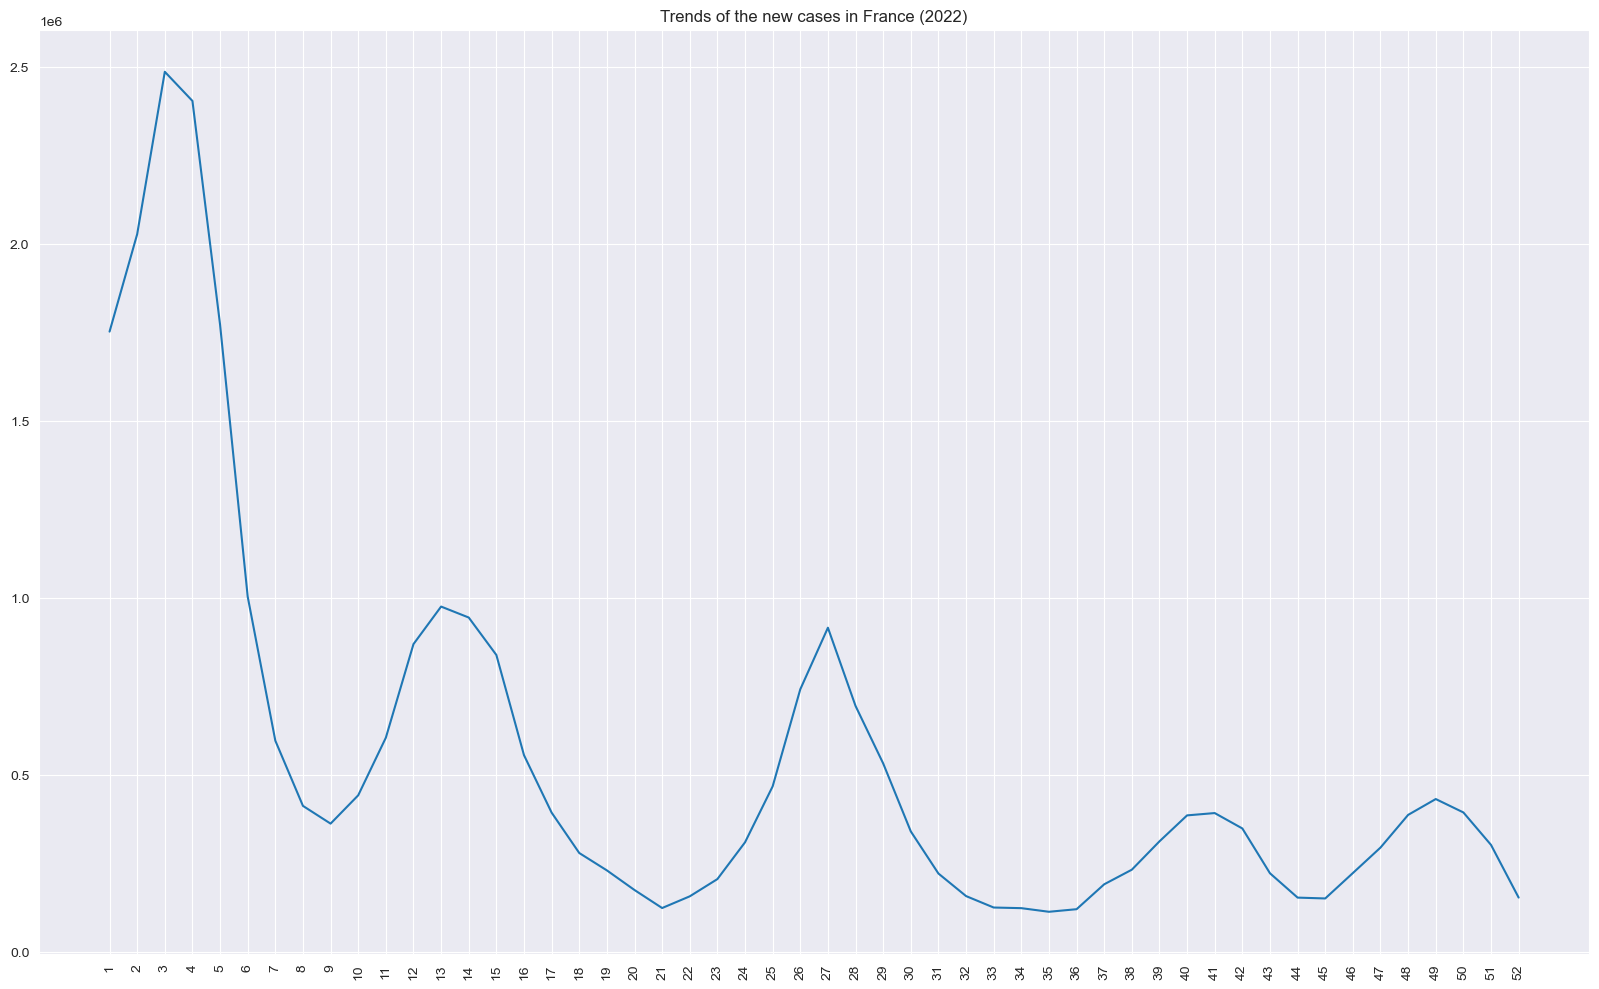

In [162]:
import matplotlib.pyplot as plt
import numpy as np

france_cases = data[(data['country'] == 'France') & (data['year'] == '2022')]

x = france_cases['week']
y = france_cases['new_cases']

fig = plt.figure(figsize=(20, 12))

plt.plot(x, y)
plt.xticks(x, rotation=90)
plt.title('Trends of the new cases in France (2022)')

plt.show()

#data[(data['country'] == 'France') & (data['year'] == '2022')]['new_cases'].plot(title = 'Trends of the new cases in France (2022)', kind='line', x = 'year_week')

### Question 9

In [163]:
temp = data.groupby('country')['population'].unique().astype(int).reset_index().sort_values('population')
merged_df = pd.merge(df, temp[['country', 'population']], on='country', how='left')

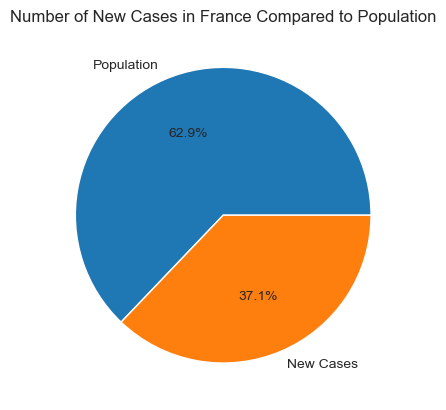

In [164]:
import matplotlib.pyplot as plt

population = merged_df[merged_df['country'] == 'France']['population'].values[0]
valueTwo = merged_df[merged_df['country'] == 'France']['new_cases'].values[0]

# Create a pie plot
plt.pie([population, valueTwo], labels=['Population', 'New Cases'], autopct='%1.1f%%')

plt.title('Number of New Cases in France Compared to Population')

plt.show()


### Question 10 - FINIR CA (by week?)

In [171]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

new_france_cases =  data[(data['country'] == 'France')]

for year in data['year'].unique():
    fig.add_trace(go.Violin(x=new_france_cases['year'][new_france_cases['year'] == year],
                            y=new_france_cases['new_cases'][new_france_cases['year'] == year],
                            name=year,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(height=800, width=1500)

fig.show()

## Exercice 2

### Question 1

In [169]:
employee_df = pd.read_csv("data/employees.csv")
layoffs_df = pd.read_csv("data/layoffs.csv")

In [170]:
employee_df.isnull().sum()

First Name             0
Last Name              0
Email                  0
Phone                  0
Gender                 0
Age                    0
Job Title              0
Years Of Experience    0
Salary                 0
Department             0
dtype: int64

### Question 2

In [167]:
import seaborn as sns

sns.set_style('darkgrid')

### Question 3 - TO FINISH ALSO, USE SNS INSTEAD OF PLT

In [172]:
employee_df.head()

,First Name,Last Name,Email,Phone,Gender,Age,Job Title,Years Of Experience,Salary,Department
0,Jose,Lopez,joselopez0944@slingacademy.com,+1-971-533-4552x1542,male,25,Project Manager,1,8500,Product
1,Diane,Carter,dianecarter1228@slingacademy.com,881.633.0107,female,26,Machine Learning Engineer,2,7000,Product
2,Shawn,Foster,shawnfoster2695@slingacademy.com,001-966-861-0065x493,male,37,Project Manager,14,17000,Product
3,Brenda,Fisher,brendafisher3185@slingacademy.com,001-574-564-4648,female,31,Web Developer,8,10000,Product
4,Sean,Hunter,seanhunter4753@slingacademy.com,5838355842,male,35,Project Manager,11,14500,Product


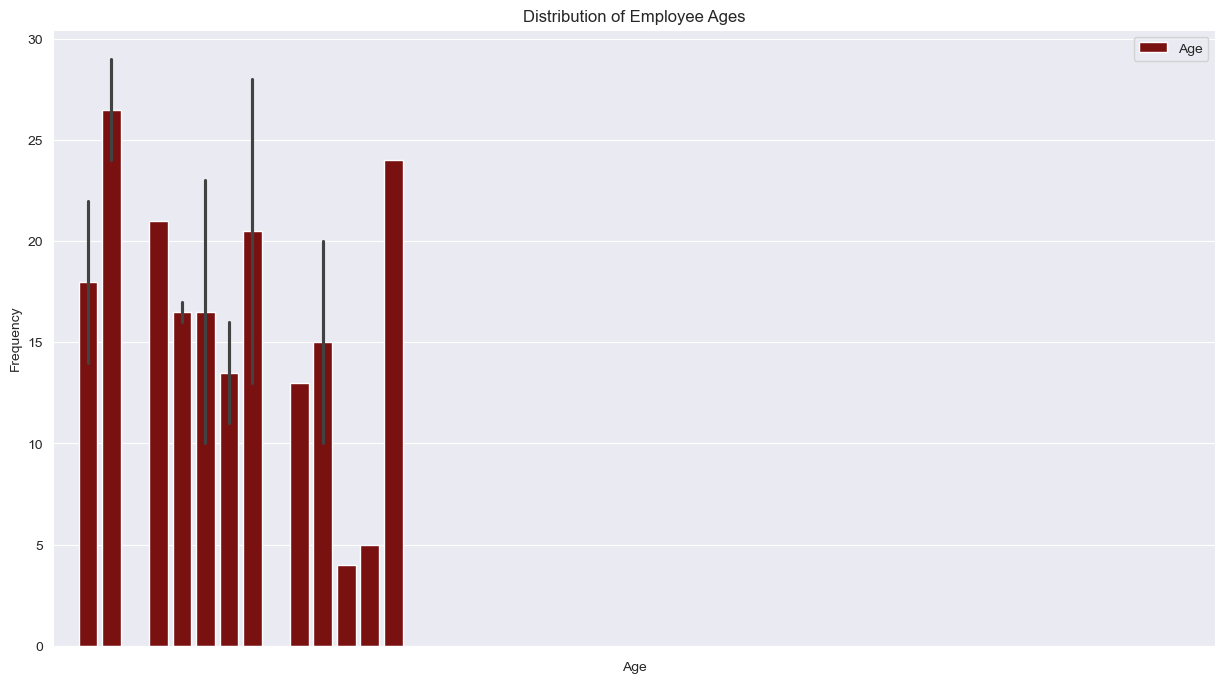

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

sns.barplot(x=employee_df['Age'], y=employee_df['Age'].value_counts(), color='darkred', label='Age')

plt.xticks(list(range(20, 50, 1)))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Ages')

plt.show()